In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create Files_Name
image_dir= 'garbage_classification'
pd.DataFrame(os.listdir(image_dir), columns=['Files_Name'])

,Files_Name
0,battery
1,biological
2,brown-glass
3,cardboard
4,clothes
5,green-glass
6,metal
7,paper
8,plastic
9,shoes


In [22]:
files = [i for i in glob.glob(image_dir + "\\*\\*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("\\")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,garbage_classification\battery\battery476.jpg,battery
1,garbage_classification\battery\battery179.jpg,battery
2,garbage_classification\plastic\plastic50.jpg,plastic
3,garbage_classification\biological\biological46...,biological
4,garbage_classification\green-glass\green-glass...,green-glass
...,...,...
15505,garbage_classification\white-glass\white-glass...,white-glass
15506,garbage_classification\metal\metal64.jpg,metal
15507,garbage_classification\clothes\clothes4194.jpg,clothes
15508,garbage_classification\clothes\clothes5187.jpg,clothes


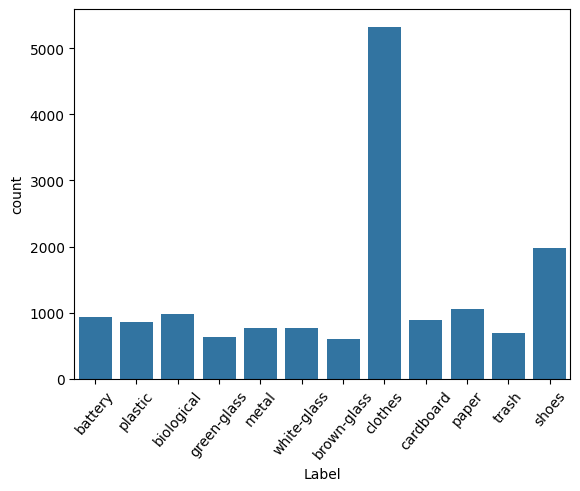

In [23]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [24]:
# train_data_dir = image_dir
batch_size = 128                           # de 32 para 128
target_size = (224,224)
validation_split = 0.2

In [25]:
def load_images_from_directory(directory, validation_split=0.2, subset="training", seed=None, image_size=(256, 256), batch_size=32):
    """
    디렉토리에서 이미지를 로드하여 TensorFlow 스타일의 데이터셋을 생성합니다.
    """
    # 이미지 파일 경로 및 라벨을 저장할 리스트 초기화
    image_paths = []
    labels = []

    # 디렉토리 내의 클래스 및 이미지 파일 확인
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue

        # 클래스 내의 이미지 파일 읽기
        image_files = sorted(os.listdir(class_path))
        num_images = len(image_files)
        split_index = int(num_images * (1 - validation_split))

        if subset == "training":
            image_files = image_files[:split_index]
        elif subset == "validation":
            image_files = image_files[split_index:]

        # 이미지 파일 경로와 라벨 저장
        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            image_paths.append(image_path)
            labels.append(class_name)

    # 이미지와 라벨을 텐서로 변환
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)
        images.append(image)
    images = np.array(images)
    labels = np.array(labels)

    # 데이터셋 생성
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(len(images), seed=seed)
    dataset = dataset.batch(batch_size)

    return dataset

In [26]:
# train 데이터셋 로드
train = load_images_from_directory(
    image_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size
)

# validation 데이터셋 로드
validation = load_images_from_directory(
    image_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size
)

In [27]:
train_data_dir =image_dir
batch_size = 128                           # de 32 para 128
target_size = (224,224)
validation_split = 0.2

In [31]:
train_data_dir

'garbage_classification'

In [33]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    'garbage_classification/battery/',
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         # de 100 para 50
    image_size=target_size,
    batch_size=batch_size,
)
# validation= tf.keras.preprocessing.image_dataset_from_directory(
#     train_data_dir,
#     validation_split=validation_split,
#     subset="validation",
#     seed=100,                                                         # de 200 para 100
#     image_size=target_size,
#     batch_size=batch_size,
# )

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf8 in position 33: invalid start byte